### Software para testar a normalidade dos Dados

Objetivos da Empresa:

- Fazer upload dos dados.

- Informar se os dados são normais ou não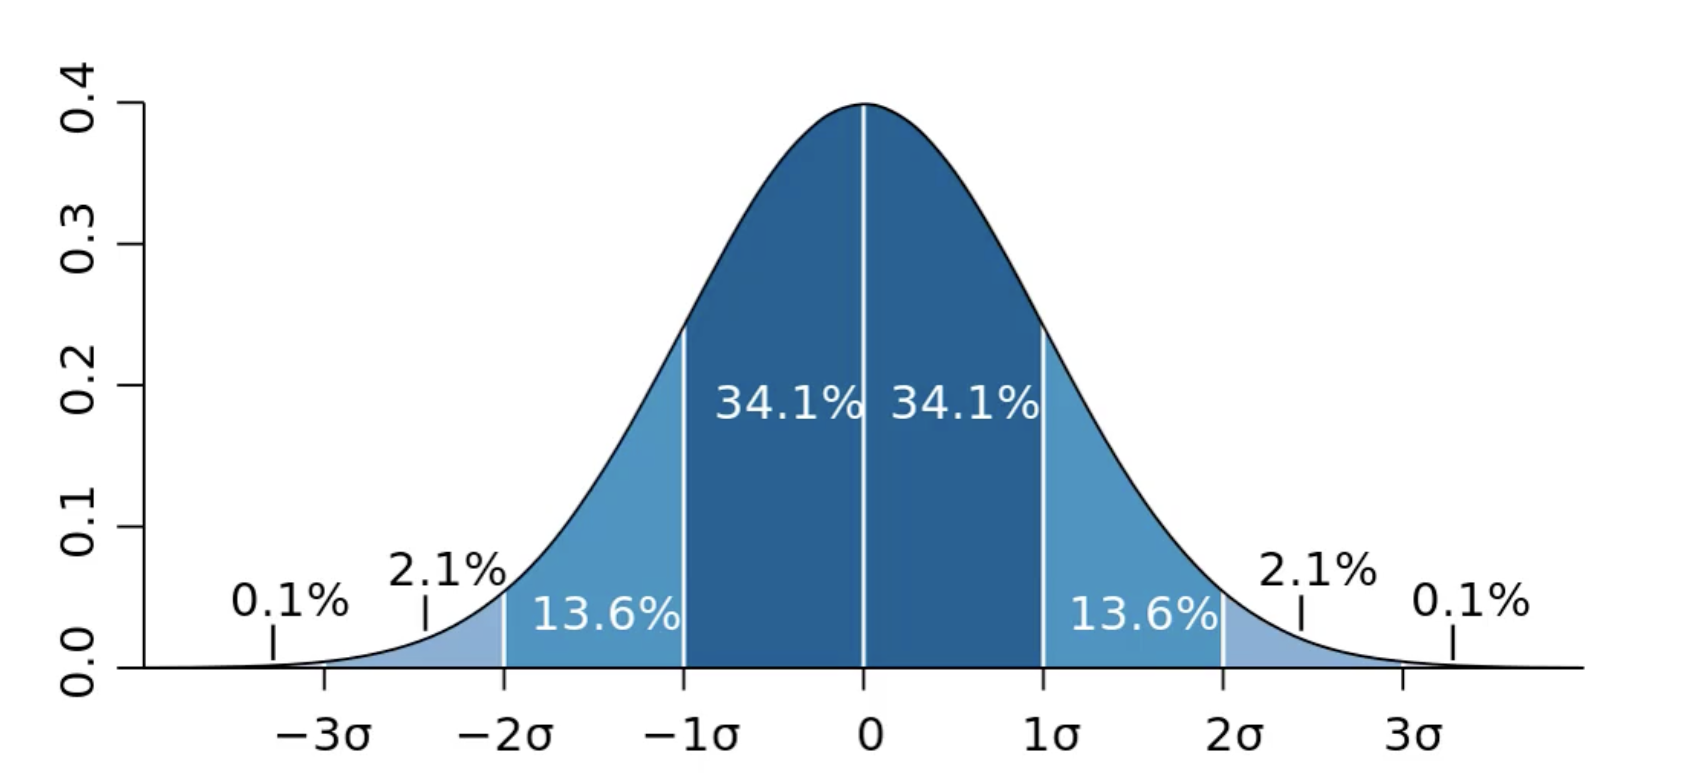.

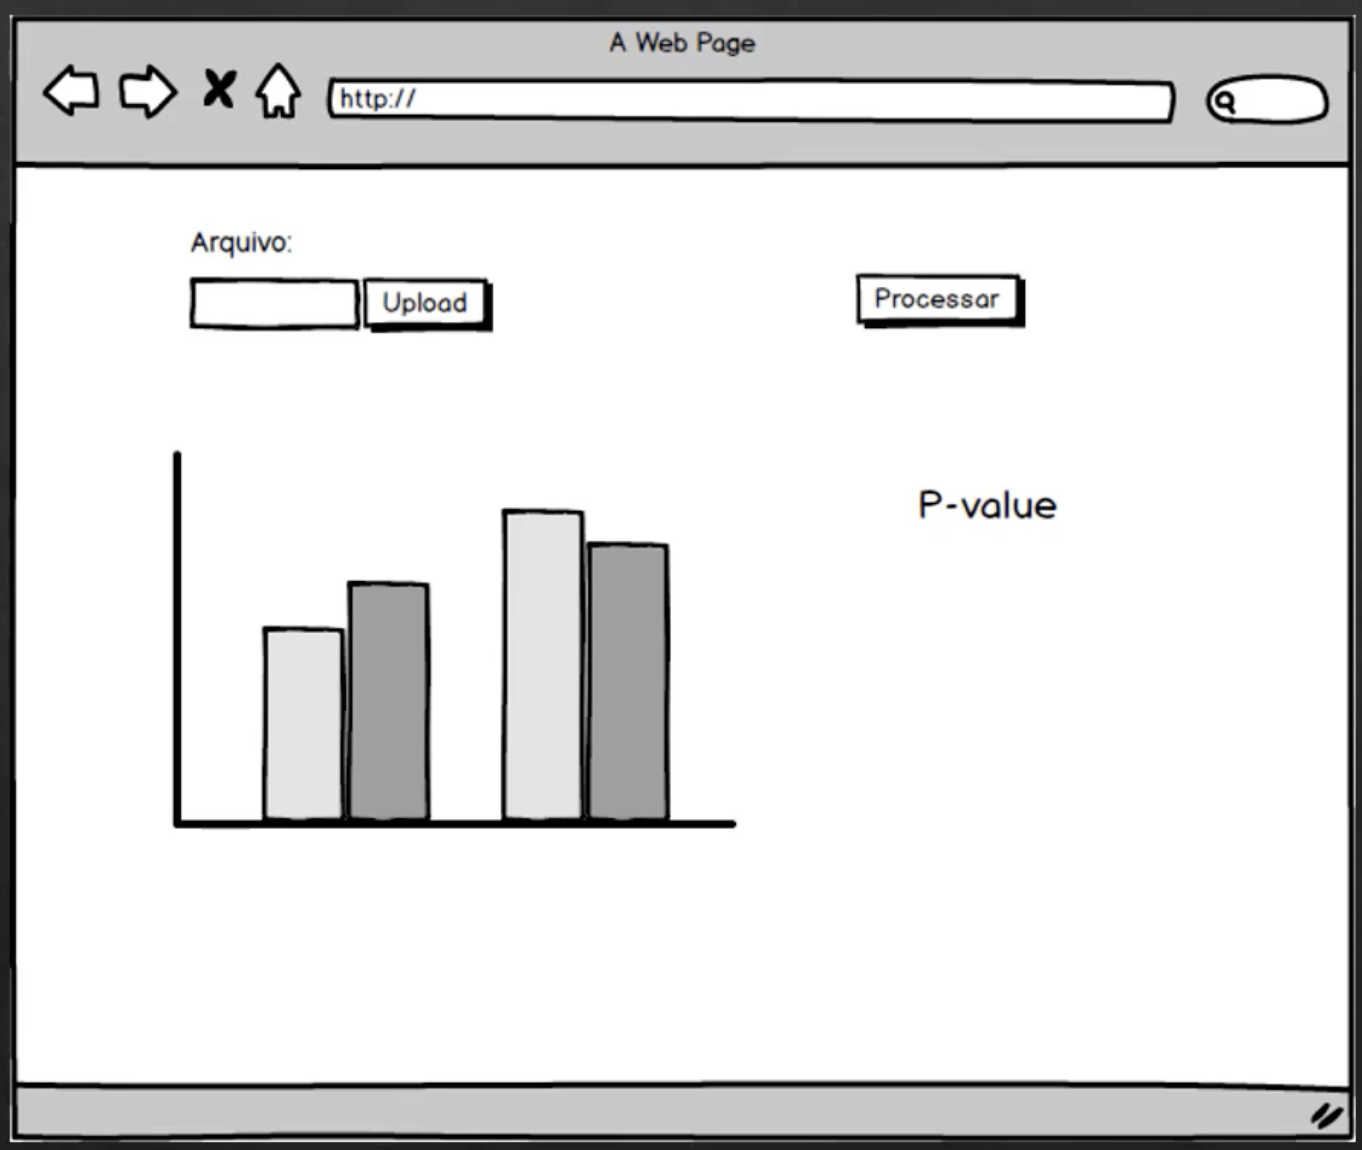

O cliente solicitou três técnicas que gostaria que fossem implementadas.

- 1a -> Histograma

- 2a -> QQ-plot (Diagrama de Probabilidade Normal)

- 3a -> Teste de Hipótese - Shapiro-Wilk



O teste Shapiro-Wilk é um teste de hipótese que avalia se um conjunto de dados tem uma distribuição normal. Ele foi publicado em 1965 por Samuel Sanford Shapiro e Martin Wilk.


$H_0$: Os dados são normalmente distribuídos.

$H_1$: Os dados não são normalmente distribuídos.

Estatística de teste($W$): uma medida de quão bem os dados se ajustam a uma distribuição normal.

$p-valor$: a probabilidade de observar uma estatística de teste tão extrema quanto a calculada se os dados forem realmente normalmente distribuídos.

Interpretação:

Se o $p-valor$ for menor que o nível de significância (geralmente 0,05), então a hipótese nula é rejeitada e conclui-se que os dados não são normalmente distribuídos.

Se o $p-valor$ for maior que o nível de significância, então a hipótese nula não é rejeitada e conclui-se que os dados são normalmente distribuídos (ou que não há evidências suficientes para concluir que eles não são normalmente distribuídos).

O teste Shapiro-Wilk é considerado um teste poderoso para normalidade, especialmente para amostras pequenas. Ele é frequentemente usado nas análises de dados para verificar a suposição de normalidade antes de realizar outros testes estatísticos que requerem normalidade.



```python
#Histograma

ax_hist.hist(data.iloc[:,0].dropna(), bins="auto", color='red',alpha=0.8, rwidth=0.85)

##QQplot

stats.probplot(data.iloc[:,0].dropna(), dist='norm', plot=ax_qq)

#Teste de Shapiro-Wilk

shapiro_test = stats.shapiro(data.iloc[:,0].dropna())

```

Utilizaremos duas bases de dados neste app. Uma será a ``ndata.csv`` (dados que seguem a distribuição normal), a outra será ``nndata.csv`` (dados que não seguem a distribuição normal)

In [ ]:
!pip install streamlit --quiet
!pip install plotly.express
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 4s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [ ]:
%%writefile normead.py

###Bibliotecas Básicas

import numpy as np
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import scipy.stats as stats

###Configuração de Páginas
###Título

st.set_page_config(page_title="Teste de Normalidade", layout="wide")
st.title("Teste de Normalidade")

with st.sidebar:
    upload_file = st.file_uploader("Escolha o arquivo:",type=['csv'],
                                   accept_multiple_files=False)
    alpha = st.slider("Nível de Significância", min_value=0.01, max_value=0.1, value=0.05, step=0.01)
    teste = st.selectbox("Selecione o Teste", ["Teste de Shapiro-Wilk","Teste de D'Agostino's K^2", "Teste Kolmogorov Smirnov"])
    testes = {"Teste de Shapiro-Wilk":stats.shapiro,
              "Teste Kolmogorov Smirnov":stats.kstest,
              "Teste de D'Agostino's K^2":stats.normaltest}
    process_button = st.button("Processar")

if process_button and upload_file is not None:
    try:
        data = pd.read_csv(upload_file, header=0)
        if data.empty or data.iloc[:,0].isnull().all():
            st.error("O arquivo está vazio ou a primeira coluna não tem dados válidos")
        else:
            col1, col2 = st.columns(2)
            with col1:
                fig_hist, ax_hist = plt.subplots()
                ax_hist.hist(data.iloc[:,0].dropna(),bins="auto",
                             color='blue', alpha=0.7, rwidth=0.85)
                ax_hist.set_title("Histograma")
                st.pyplot(fig_hist)
            with col2:
                fig_qq, ax_qq = plt.subplots()
                stats.probplot(data.iloc[:,0].dropna(), dist='norm', plot=ax_qq)
                ax_qq.set_title("QQ Plot")
                st.pyplot(fig_qq)
            if teste == "Teste Kolmogorov Smirnov":
                # Convert the column to a NumPy array of floats
              data_array = data.iloc[:, 0].dropna().to_numpy(dtype=float)
              test_normalidade = testes[teste](data_array, cdf='norm')
              st.write(f"Valor de P: {test_normalidade.pvalue:.5f}")
              if test_normalidade.pvalue > alpha:
                st.success("Não existem evidências suficientes para rejeitar a hipótese de normalidade dos dados")
              else:
                st.warning("Existem evidências suficientes para rejeitar a hipótese de normalidade dos dados")
            else:
              test_normalidade = testes[teste](data.iloc[:,0].dropna())
              st.write(f"Valor de P: {test_normalidade.pvalue:.5f}")
              if test_normalidade.pvalue > alpha:
                st.success("Não existem evidências suficientes para rejeitar a hipótese de normalidade dos dados")
              else:
                st.warning("Existem evidências suficientes para rejeitar a hipótese de normalidade dos dados")
    except Exception as e:
        st.error(f"Erro ao processar o arquivo: {e}")


Overwriting normead.py


In [ ]:
!curl ipv4.icanhazip.com

34.125.202.104


In [ ]:
!streamlit run normead.py & npx localtunnel --port 8501



⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.202.104:8501

your url is: https://plain-mails-sort.loca.lt
  Stopping...
^C
